In [1]:
import jupyter_fix

jupyter_fix.fix_jupyter_path()

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import src.utility.letter_operations as lo
import os
import re

In [8]:
path_emnist = 'data/generated/emnist/trial_0/'
path_kuzushiji = 'data/generated/kuzushiji/trial_0/'

In [9]:
directory_files_emnist = os.listdir(path_emnist)
directory_files_kuzushiji = os.listdir(path_kuzushiji)
page_list_emnist = []
page_list_kuzushiji = []

for file in directory_files_emnist:
    page_list_emnist.append(cv2.imread(path_emnist + file, cv2.IMREAD_GRAYSCALE))

for file in directory_files_kuzushiji:
    page_list_kuzushiji.append(cv2.imread(path_kuzushiji + file, cv2.IMREAD_GRAYSCALE))

In [10]:
letters_mnist = []
letters_kuzushiji = []

for page in page_list_emnist:
    for i in range(0, page.shape[0], 32):
        for j in range(0, page.shape[1], 32):
            single_letter = page[i:i + 32, j:j + 32].copy()
            single_letter = lo.invert_pixels(single_letter) // 255
            letters_mnist.append(single_letter)

for page in page_list_kuzushiji:
    for i in range(0, page.shape[0], 32):
        for j in range(0, page.shape[1], 32):
            single_letter = page[i:i + 32, j:j + 32].copy()
            single_letter = lo.invert_pixels(single_letter) // 255
            letters_kuzushiji.append(single_letter)

In [14]:
with open('data/winnie_the_pooh/pg67098.txt', 'r') as book:
    data = book.read()

In [15]:
pattern = re.compile('^[a-zA-Z0-9]*$')

result = "".join([s for s in data if pattern.match(s)]).replace('\n', "")
result = list(result)
len(result)

107812

In [20]:
mean_kuzushiji_values = [np.mean(x) for x in letters_kuzushiji]
mean_emnist_values = [np.mean(x) for x in letters_mnist]

(array([7.0000e+00, 2.0000e+00, 1.2000e+01, 1.0000e+01, 3.8000e+01,
        7.4000e+01, 1.1300e+02, 9.3000e+01, 2.8200e+02, 4.4600e+02,
        7.6400e+02, 1.1660e+03, 1.7540e+03, 2.5480e+03, 1.5900e+03,
        3.8400e+03, 5.3420e+03, 6.5330e+03, 8.1380e+03, 9.8620e+03,
        1.1251e+04, 1.2778e+04, 6.7770e+03, 1.4518e+04, 1.5104e+04,
        1.5253e+04, 1.4773e+04, 1.4259e+04, 1.3045e+04, 6.1300e+03,
        1.1120e+04, 9.4870e+03, 7.9700e+03, 6.5100e+03, 5.2290e+03,
        4.0740e+03, 2.9430e+03, 1.1540e+03, 1.9140e+03, 1.3060e+03,
        8.7300e+02, 6.5700e+02, 4.5300e+02, 3.4600e+02, 1.5700e+02,
        2.9600e+02, 2.5600e+02, 3.7000e+02, 4.4000e+02, 5.0200e+02,
        6.6300e+02, 3.7900e+02, 8.2200e+02, 9.1200e+02, 1.0530e+03,
        1.2300e+03, 1.3180e+03, 1.4130e+03, 1.4910e+03, 7.5800e+02,
        1.5780e+03, 1.6070e+03, 1.5810e+03, 1.6130e+03, 1.5800e+03,
        1.5470e+03, 7.8300e+02, 1.4500e+03, 1.3920e+03, 1.3580e+03,
        1.2870e+03, 1.1320e+03, 1.1400e+03, 1.04

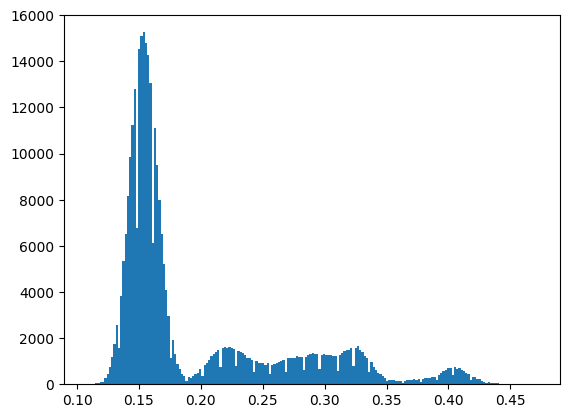

In [21]:
plt.hist(mean_kuzushiji_values, bins=200)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        4.0000e+00, 2.0000e+00, 7.0000e+00, 8.0000e+00, 1.4000e+01,
        3.1000e+01, 3.5000e+01, 8.7000e+01, 7.5000e+01, 1.0700e+02,
        2.9100e+02, 1.8500e+02, 2.2900e+02, 7.1200e+02, 4.8700e+02,
        1.3860e+03, 9.7700e+02, 1.1550e+03, 2.8750e+03, 1.7920e+03,
        4.6340e+03, 2.8190e+03, 3.1730e+03, 7.5490e+03, 4.3080e+03,
        4.7340e+03, 1.0632e+04, 5.8270e+03, 1.2860e+04, 6.7600e+03,
        6.9920e+03, 1.4627e+04, 7.5010e+03, 1.5259e+04, 7.5880e+03,
        7.4750e+03, 1.4271e+04, 6.7030e+03, 6.4860e+03, 1.1686e+04,
        5.3030e+03, 9.6680e+03, 4.2340e+03, 3.7270e+03, 6.5760e+03,
        2.6690e+03, 4.5230e+03, 1.8200e+03, 1.5800e+03, 2.5170e+03,
        1.0340e+03, 8.3700e+02, 1.2550e+03, 4.9300e+02, 7.4100e+02,
        2.9800e+02, 2.3900e+02, 4.0900e+02, 1.4700e+02, 2.5700e+02,
        9.9000e+01, 1.1300e+02, 2.5600e+02, 1.1500e+02, 1.4000e+02,
        3.3000e+02, 2.0300e+02, 4.6900e+02, 2.77

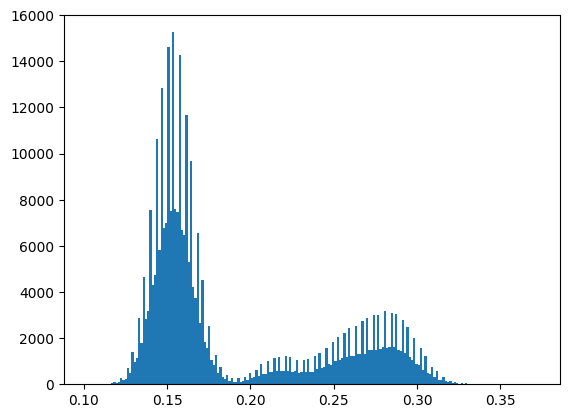

In [22]:
plt.hist(mean_emnist_values, bins=200)

In [31]:
filtered_letters_mnist = [x for x in letters_mnist if np.mean(x) > 0.19]
print('loss = ', (len(filtered_letters_mnist), len(result)))

filtered_letters_kuzushiji = [x for x in letters_kuzushiji if np.mean(x) > 0.19]
print('loss = ', (len(filtered_letters_kuzushiji), len(result)))

loss =  (107646, 107812)
loss =  (107485, 107812)


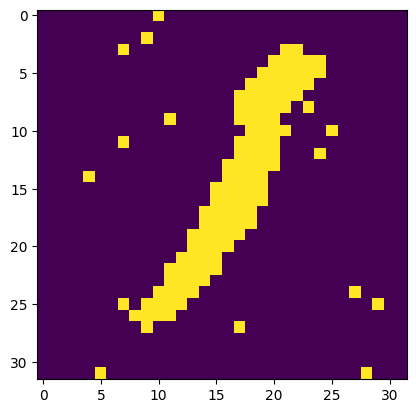

In [16]:
a = sorted(filtered_letters_kuzushiji, key=lambda x: np.mean(x))
plt.imshow(a[0])

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

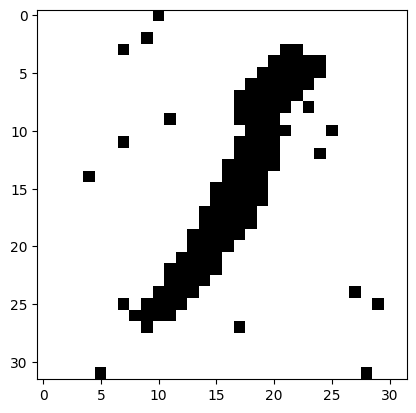

In [18]:
img = lo.invert_pixels(a[0])
plt.imshow(img, cmap='gray')
img

In [ ]:
plt.imshow(letters_kuzushiji[0], cmap='gray')

In [ ]:
np.mean(mean_letter_values)

In [ ]:
import src.utility.symbols_loader as sl
import matplotlib.pyplot as plt

my_test = sl.load_kuzushiji_pages()
plt.imshow(my_test[0], cmap='gray')